In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import pandas as pd

# Cargar el conjunto de datos iris
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns =iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = train_test_split(iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'
                                                             ]], iris_df[['species']], test_size=0.2, random_state=42)

In [4]:
##Ajustar el modelo con los datos

gnb = GaussianNB()
gnb.fit(X_train,y_train)

c:\Users\sonya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [5]:
gnb.class_count_

array([40., 41., 39.])

In [6]:
gnb.class_prior_

array([0.33333333, 0.34166667, 0.325     ])

In [7]:
gnb.feature_names_in_

array(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'], dtype=object)

In [8]:
gnb.theta_

array([[4.99      , 3.4525    , 1.45      , 0.245     ],
       [5.9195122 , 2.77073171, 4.24146341, 1.32195122],
       [6.53333333, 2.96666667, 5.52051282, 2.        ]])

In [9]:
### Evaluación del modelo
y_pred = gnb.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

<Axes: >

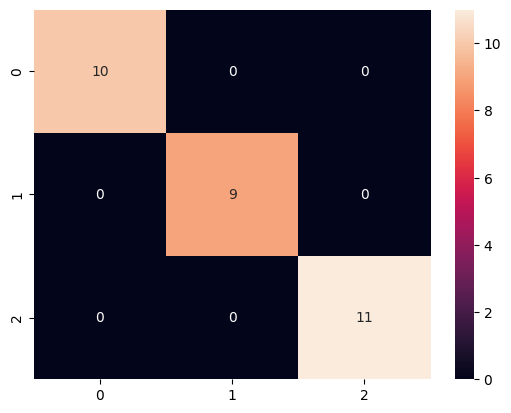

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test,y_pred),annot = True)

In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [19]:
y_pred_proba= gnb.predict_proba(X_test)

#curva ROC

fpr,tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1],pos_label='Virginica')
fprr,tprr, thresholdsr = roc_curve(y_test, y_pred_proba[:,0],pos_label='setosa')
fprrr,tprrr, thresholdsrr = roc_curve(y_test, y_pred_proba[:,2],pos_label='versicolor')

c:\Users\sonya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


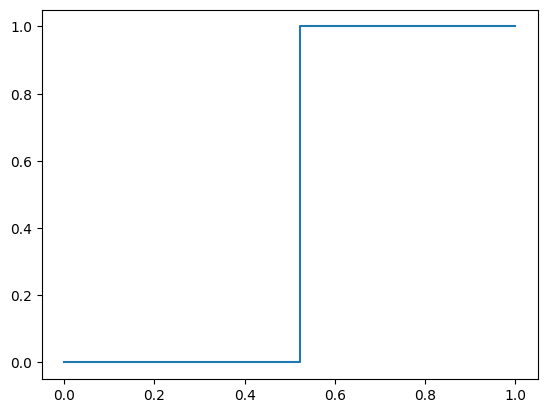

In [23]:
plt.plot(fprrr,tprrr, label ='ROC curve versicolor')

In [21]:
thresholds

array([           inf, 9.99982769e-01, 2.04863718e-17])

In [22]:
y_pred_proba[:,1]

array([9.95635767e-01, 4.96158126e-14, 4.92947614e-12, 9.77593559e-01,
       8.70022596e-01, 1.73180181e-13, 9.99955645e-01, 1.18219872e-06,
       9.92158276e-01, 9.99938983e-01, 5.88867020e-04, 2.04863718e-17,
       4.22431128e-17, 5.31248651e-17, 8.92960033e-17, 6.02930476e-01,
       5.05656256e-07, 9.99982769e-01, 9.98040608e-01, 2.94971181e-06,
       5.98122647e-16, 9.89169319e-02, 1.43755981e-13, 1.83103291e-05,
       1.64396056e-09, 1.37161759e-06, 6.28437300e-04, 1.36528257e-08,
       2.08539921e-15, 1.31930917e-15])

In [24]:
###Gráfico PR (Precision-Recall)

[]

NameError: name 'recall' is not defined